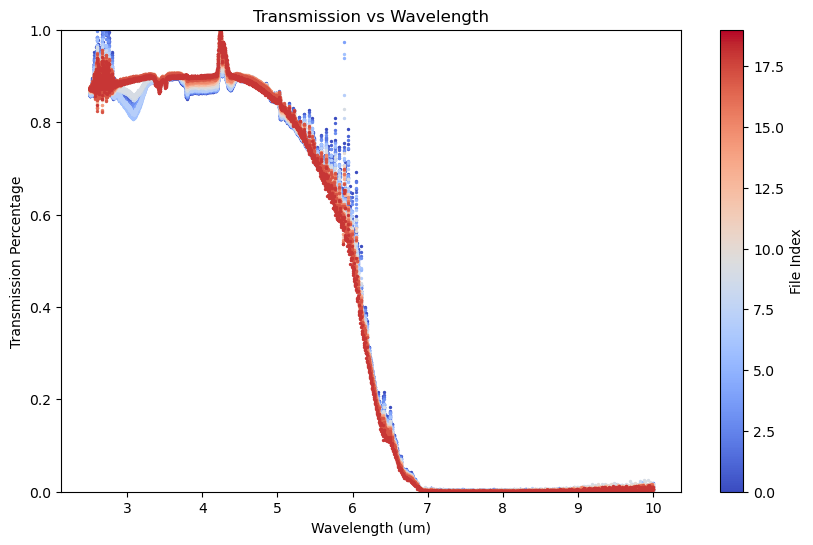

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Function to convert wavenumber to wavelength
def wavenumber_to_wavelength(wavenumber):
    return 1 / wavenumber * 1e7

# Function to plot the data from a file with color gradient
def plot_file(file_path, file_index, total_files):
    data = np.loadtxt(file_path)
    wavenumber = data[:, 0]
    wavelength = wavenumber_to_wavelength(wavenumber)/1000
    transmission = data[:, 1]/100

    # Assign color based on the file index
    color = cm.coolwarm(file_index / total_files)

    plt.scatter(wavelength, transmission, label=os.path.basename(file_path), color=color, s=2)

# Directory containing your text files
data_directory = "/Users/arpi/data/10.10.23"

# Get a list of all text files in the directory
file_list = [file for file in os.listdir(data_directory) if file.endswith(".txt")]

# Sort the files based on the numerical part of the file names
file_list.sort(key=lambda x: int(x[5:-4]))

# Set up the plot
plt.figure(figsize=(10, 6))
plt.xlabel('Wavelength (um)')
plt.ylabel('Transmission Percentage')
plt.ylim(0,1)
plt.title('Transmission vs Wavelength')

# Iterate through files and plot each one with color gradient
for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_directory, file_name)
    plot_file(file_path, i, len(file_list))

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=0, vmax=len(file_list)))
sm.set_array([])  # An empty array to associate with the colorbar
cbar = plt.colorbar(sm, label='File Index')

# Add legend
#plt.legend()

# Save the plot with higher quality
plt.savefig("Measured_Temp_sapphire_plot.png", dpi=500)  # Adjust DPI value here

# Show the plot
plt.show()
